In [24]:
from johnson import *

In [25]:
# process_folder(Corpus('ecco_tcp').path_txt)
corpus = Corpus('ecco_tcp')
corpus2 = Corpus('tedjdh')
x=corpus.meta
y=corpus2.meta
# corpus3 = Corpus('canon_fiction')
# corpus3.meta['year']=pd.to_numeric(corpus3.meta.year, errors='coerce')
# corpus3.meta.query('year<1700')


In [26]:
# process_corpus(corpus2)

In [45]:

# def get_db_data(suffix=''):
#     db=get_db(flag='r',suffix=suffix)
#     o=[]
#     for key in tqdm(db.keys(), total=len(db)):
#         val = db[key]
#         odx={'id':key}
#         t=corpus.textd[key]
#         if t is None: 
#             t=corpus2.textd[key]
#         if t is None:
#             continue
#         sents=t.sents()[:1000]
#         odx['num_words'] = sum(len(x.split()) for x in sents)
#         odx['num_sents'] = len(sents)
#         if not odx['num_words'] or not odx['num_sents']: continue
#         odx['num_parallels'] = sum(len(y) for x,y in val)
#         odx['num_parallels_per_1000_words'] = odx['num_parallels'] / odx['num_words'] * 1000
#         odx['num_parallels_per_1000_sents'] = odx['num_parallels'] / odx['num_sents'] * 1000
#         odx['avg_parallels_per_parallel_sent'] = np.mean([len(y) for x,y in val])

#         val2=[(x,[z for z in y if len(z[0])>1]) for x,y in val]
#         odx['num_parallels2'] = sum(len(y) for x,y in val2)
#         odx['num_parallels2_per_1000_words'] = odx['num_parallels2'] / odx['num_words'] * 1000
#         odx['num_parallels2_per_1000_sents'] = odx['num_parallels2'] / odx['num_sents'] * 1000
#         odx['avg_parallels2_per_parallel_sent'] = np.mean([len(y) for x,y in val2])
#         o.append(odx)
#     return pd.DataFrame(o)
        

In [113]:
def unpack_parallel(xyz):
    x,y,z = xyz
    words = (tuple(a[0] for a in x), y[0], tuple(b[0] for b in z))
    pos = (tuple(a[1] for a in x), y[1], tuple(b[1] for b in z))
    words_flat = tuple(list(words[0]) + [words[1]] + list(words[2]))
    is_valid = not all(w == w.upper() for w in words_flat)
    plen = len(x)
    midword = words[1].lower()
    if midword=='&': midword='and'
    return {
        'word_beg': ' '.join(words[0]),
        'word_mid': midword,
        'word_end': ' '.join(words[2]),

        'pos_beg':' '.join(pos[0]),
        'pos_mid':pos[1],
        'pos_end':' '.join(pos[2]),

        'plen':plen,
        'is_valid':is_valid,
    }

def get_db_data(suffix=''):
    db=get_db(flag='r',suffix=suffix)
    o=[]
    for key in tqdm(db.keys(), total=len(db)):
        for sent_num, sent_parallels in db[key]:
            for paral in sent_parallels:
                pdat = unpack_parallel(paral)
                o.append({'id':key, 'sent_num':sent_num, **pdat})
    return pd.DataFrame(o)
        

In [114]:
data = get_db_data(suffix='')
data

  0%|          | 0/4755 [00:00<?, ?it/s]

100%|██████████| 4755/4755 [00:11<00:00, 397.84it/s]


,id,sent_num,word_beg,word_mid,word_end,pos_beg,pos_mid,pos_end,plen,is_valid
0,LandWPA2,2,WORK,by,MR,PROPN,ADP,PROPN,1,False
1,LandWPA2,3,RISE,and,FALL,NOUN,CCONJ,NOUN,1,False
2,LandWPA2,14,mortals,with,eyes,NOUN,ADP,NOUN,1,True
3,LandWPA2,15,rocks,and,shoals,NOUN,CCONJ,NOUN,1,True
4,LandWPA2,16,future,than,past,NOUN,ADP,NOUN,1,True
...,...,...,...,...,...,...,...,...,...,...
1692725,K062220.000,15,Truth,at,length,NOUN,ADP,NOUN,1,True
1692726,K062220.000,21,Circle,of,Sphere,PROPN,ADP,PROPN,1,True
1692727,K062220.000,23,Troop,of,Wolves,PROPN,ADP,PROPN,1,True
1692728,K062220.000,29,Grav'd,on,Monument,PROPN,ADP,PROPN,1,True


In [115]:
dict(data[data.is_valid].query('plen>13').iloc[0])

{'id': 'ArnoMFE',
 'sent_num': 725,
 'word_beg': 'is exercised by a \n class to whose cherished instincts it is opposed     \n the aristocratic class',
 'word_mid': 'and',
 'word_end': 'is watched by a \n class to whose cherished prejudices it is opposed \n     the middle class',
 'pos_beg': 'AUX VERB ADP DET SPACE NOUN ADP DET ADJ NOUN PRON AUX VERB SPACE SPACE SPACE DET ADJ NOUN',
 'pos_mid': 'CCONJ',
 'pos_end': 'AUX VERB ADP DET SPACE NOUN ADP DET ADJ NOUN PRON AUX VERB SPACE SPACE SPACE DET ADJ NOUN',
 'plen': 19,
 'is_valid': True}

In [116]:
data[data.is_valid].query('plen>1').word_mid.value_counts().head(25)

and        32483
of         29695
or          8006
in          5258
to          2085
for         1801
with        1741
on          1214
from        1173
by           697
at           639
but          623
nor          532
than         439
as           366
upon         252
against      248
without      240
like         179
over         145
into         134
under        125
near         107
among         98
between       85
Name: word_mid, dtype: int64

In [39]:
meta = pd.concat([corpus2.meta, corpus.meta]).reset_index().drop_duplicates('id',keep='first').set_index('id')
meta
# meta=corpus.meta.join(corpus2.meta, how='outer', lsuffix='', rsuffix='_tedjdh')
# meta=pd.concat([meta, corpus3.meta.query('1700>year<1900').assign(medium='Fiction')])

,_id,_corpus,author,fn,id_tedjdh,medium,num_words,num_words2,ocr_accuracy,title,...,extent,id_ContentSet,id_DocNo,id_ESTC,id_GaleDocNo,id_ImageSetID,id_TCP,notes,publisher,pubplace
id,,,,,,,,,,,,,,,,,,,,,
K000039.000,_tedjdh/K000039.000,tedjdh,"Centlivre, Susanna, 1667?-1723",K000039.000.txt,CentSBC,Drama,17423.0,17776.0,0.929691,THE BASSET-Table. A COMEDY. As it is Acted at ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K000122.000,_tedjdh/K000122.000,tedjdh,"Jones, Henry, 1721-1770",K000122.000.txt,JoneHBP,Poetry,514.0,503.0,0.945525,THE Bricklayer's POEM TO THE Countess of CHEST...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K000152.000,_tedjdh/K000152.000,tedjdh,"Congreve, William, 1670-1729",K000152.000.txt,CongWPT,Poetry,309.0,310.0,0.954693,PROLOGUE TO THE COURT; On the QUEEN's Birth-Da...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K000180.000,_tedjdh/K000180.000,tedjdh,"Cumberland, Richard, 1732-1811",K000180.000.txt,CumbRFL,Drama,21157.0,20169.0,0.949095,THE FASHIONABLE LOVER; A COMEDY: As it is acte...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K000266.000,_tedjdh/K000266.000,tedjdh,"Defoe, Daniel, 1661?-1731",K000266.000.txt,DefoDDP,Non-Fiction,21918.0,20173.0,0.936901,THE Dyet of POLAND A SATYR. CONSIDER'D Paragra...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K013438.000,_ecco_tcp/K013438.000,ecco_tcp,"Defoe, Daniel, 1661?-1731.",NaN,NaN,NaN,NaN,NaN,NaN,"Scotland in danger: or, a serious enquiry into...",...,8p. ; 4⁰.,ECSS,CW105413830,N23146,CW3305413830,301600300.0,K013438.000,<NOTE>Anonymous. By Daniel Defoe.</NOTE><NOTE>...,printed by the heirs and successors of Andrew ...,[Edinburgh :
K040548.000,_ecco_tcp/K040548.000,ecco_tcp,"Whitehead, William, 1715-1785.",NaN,NaN,NaN,NaN,NaN,NaN,The goat's beard. A fable:,...,40p. ; 4⁰.,ECLL,CW112280803,T40857,CW3312280803,398900600.0,K040548.000,<NOTE>Anonymous. By William Whitehead.</NOTE><...,"printed for J. Dodsley,",London :
K054680.004,_ecco_tcp/K054680.004,ecco_tcp,"Walpole, Horace, 1717-1797.",NaN,NaN,NaN,NaN,NaN,NaN,Anecdotes of painting in England: with some ac...,...,"4v.,plates : ports. ; 4⁰.",ECFA,CW106462425,T63190,CW3306640142,853400104.0,K054680.004,<NOTE>Dedication signed: Horace Walpole.</NOTE...,"Printed by Thomas Kirgate at Strawberry-Hill,",[Twickenham] :


In [40]:
datameta=data.set_index('id').join(meta, lsuffix='_data', rsuffix='_meta')
datameta

,num_words_data,num_sents,num_parallels,num_parallels_per_1000_words,num_parallels_per_1000_sents,avg_parallels_per_parallel_sent,num_parallels2,num_parallels2_per_1000_words,num_parallels2_per_1000_sents,avg_parallels2_per_parallel_sent,...,extent,id_ContentSet,id_DocNo,id_ESTC,id_GaleDocNo,id_ImageSetID,id_TCP,notes,publisher,pubplace
id,,,,,,,,,,,,,,,,,,,,,
LandWPA2,16679,1000,440,26.380478,440.000000,1.225627,13,0.779423,13.000000,0.036212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WilkJMM2,33362,1000,692,20.742162,692.000000,1.840426,32,0.959175,32.000000,0.085106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FranJNS,28764,1000,451,15.679321,451.000000,1.354354,22,0.764845,22.000000,0.066066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArchWMO,20033,1000,296,14.775620,296.000000,1.179283,16,0.798682,16.000000,0.063745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KnapANC,35179,1000,449,12.763296,449.000000,1.316716,13,0.369539,13.000000,0.038123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K024779.000,5130,405,57,11.111111,140.740741,1.295455,5,0.974659,12.345679,0.113636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K059123.000,1703,76,25,14.679977,328.947368,1.190476,13,7.633588,171.052632,0.619048,...,"[4],15,[1]p. ; 4⁰.",ECLL,CW112283457,T69319,CW3312283457,399000900.0,K059123.000,<NOTE>With a half-title.</NOTE><NOTE>Reproduct...,"printed for T. Cadell,",London :
K014737.000,11613,363,394,33.927495,1085.399449,1.720524,54,4.649961,148.760331,0.235808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
k='num_parallels_per_1000_words'
datameta.groupby('medium').mean(numeric_only=True).sort_values(k)

,num_words_data,num_sents,num_parallels,num_parallels_per_1000_words,num_parallels_per_1000_sents,avg_parallels_per_parallel_sent,num_parallels2,num_parallels2_per_1000_words,num_parallels2_per_1000_sents,avg_parallels2_per_parallel_sent,num_words_meta,num_words2,ocr_accuracy,year,id_ImageSetID
medium,,,,,,,,,,,,,,,
french,6885.000000,185.000000,80.000000,11.619463,432.432432,1.454545,4.000000,0.580973,21.621622,0.072727,6842.000000,4989.000000,0.672026,1770.000000,NaN
Drama,10636.630909,816.063636,149.798182,14.011646,198.934550,1.213098,8.781818,0.825554,12.011207,0.070599,16169.569091,15432.392727,0.944582,1789.989091,NaN
Fiction,22107.506173,810.523457,375.612346,16.992857,498.022411,1.402679,19.908642,0.929950,27.581733,0.075256,54901.125926,50991.320988,0.972304,1791.525926,NaN
Poetry,11729.130488,553.840244,216.448780,18.497348,429.654281,1.362077,16.210976,1.505962,36.027866,0.113927,20518.537805,18985.807317,0.939877,1795.531707,NaN
Letters,22891.964286,757.767857,452.035714,19.587921,643.197525,1.506467,22.446429,0.972990,32.440988,0.075200,56584.375000,52412.232143,0.964131,1783.553571,NaN
Biography,25661.657303,915.561798,503.460674,19.666540,595.036820,1.458903,23.297753,0.913760,28.114094,0.067035,113307.252809,103622.786517,0.967638,1818.674157,NaN
Juvenilia,16648.000000,849.700000,373.600000,21.090560,439.372266,1.314260,27.900000,1.555835,33.731062,0.098830,20593.400000,19821.300000,0.979382,1787.600000,NaN
Non-Fiction,21269.442236,815.867081,476.867081,22.732910,646.596283,1.526315,24.028571,1.152865,32.609852,0.076062,93745.631677,84663.051553,0.954058,1804.972671,NaN
Miscellany,24779.964286,953.500000,582.035714,22.848441,608.770022,1.496431,33.678571,1.317286,35.020117,0.086464,90234.678571,84579.035714,0.965071,1794.285714,NaN


In [42]:
top=datameta.query('num_words_data>=5000').groupby('author').mean(numeric_only=True).sort_values(k,ascending=False)
top.head(20)

,num_words_data,num_sents,num_parallels,num_parallels_per_1000_words,num_parallels_per_1000_sents,avg_parallels_per_parallel_sent,num_parallels2,num_parallels2_per_1000_words,num_parallels2_per_1000_sents,avg_parallels2_per_parallel_sent,num_words_meta,num_words2,ocr_accuracy,year,id_ImageSetID
author,,,,,,,,,,,,,,,
"Donaldson, J. (John), 1737-1801",20160.000000,680.000000,866.000000,42.956349,1273.529412,1.804167,70.000000,3.472222,102.941176,0.145833,10131.000000,9904.000000,0.991511,1780.000000,NaN
"Webster, Charles, 1750-1795.",8659.000000,224.000000,365.000000,42.152674,1629.464286,2.172619,22.000000,2.540709,98.214286,0.130952,NaN,NaN,NaN,1793.000000,1.619018e+08
"Ferguson, Adam, 1723-1816",37818.000000,1000.000000,1577.000000,41.699720,1577.000000,2.026992,112.000000,2.961553,112.000000,0.143959,104104.000000,101672.000000,0.989462,1767.000000,NaN
"Crawford, George, fl. 1710",27174.000000,1000.000000,1081.000000,39.780673,1081.000000,2.047348,32.000000,1.177596,32.000000,0.060606,302584.000000,269411.000000,0.896769,1716.000000,NaN
"Harper, Andrew, d. 1790.",11385.000000,338.000000,451.000000,39.613527,1334.319527,1.919149,39.000000,3.425560,115.384615,0.165957,NaN,NaN,NaN,1785.000000,1.000500e+09
"Pollard, Robert, 1755-1838",27317.000000,1000.000000,1069.000000,39.133141,1069.000000,1.943636,48.000000,1.757148,48.000000,0.087273,71884.000000,66766.000000,0.916017,1793.000000,NaN
"Philadelphus, Theophilus",24470.000000,702.000000,939.000000,38.373519,1337.606838,2.095982,66.000000,2.697180,94.017094,0.147321,24433.000000,21492.000000,0.974543,1777.000000,NaN
"Wakefield, Gilbert, 1756-1801",12192.000000,395.000000,461.000000,37.811680,1167.088608,2.013100,44.000000,3.608924,111.392405,0.192140,12243.000000,11611.000000,0.968962,1794.000000,NaN
"Rowlands, Henry, 1655-1723",16966.000000,227.000000,628.000000,37.015207,2766.519824,3.715976,22.000000,1.296711,96.916300,0.130178,16776.000000,15454.000000,0.959704,1705.000000,NaN


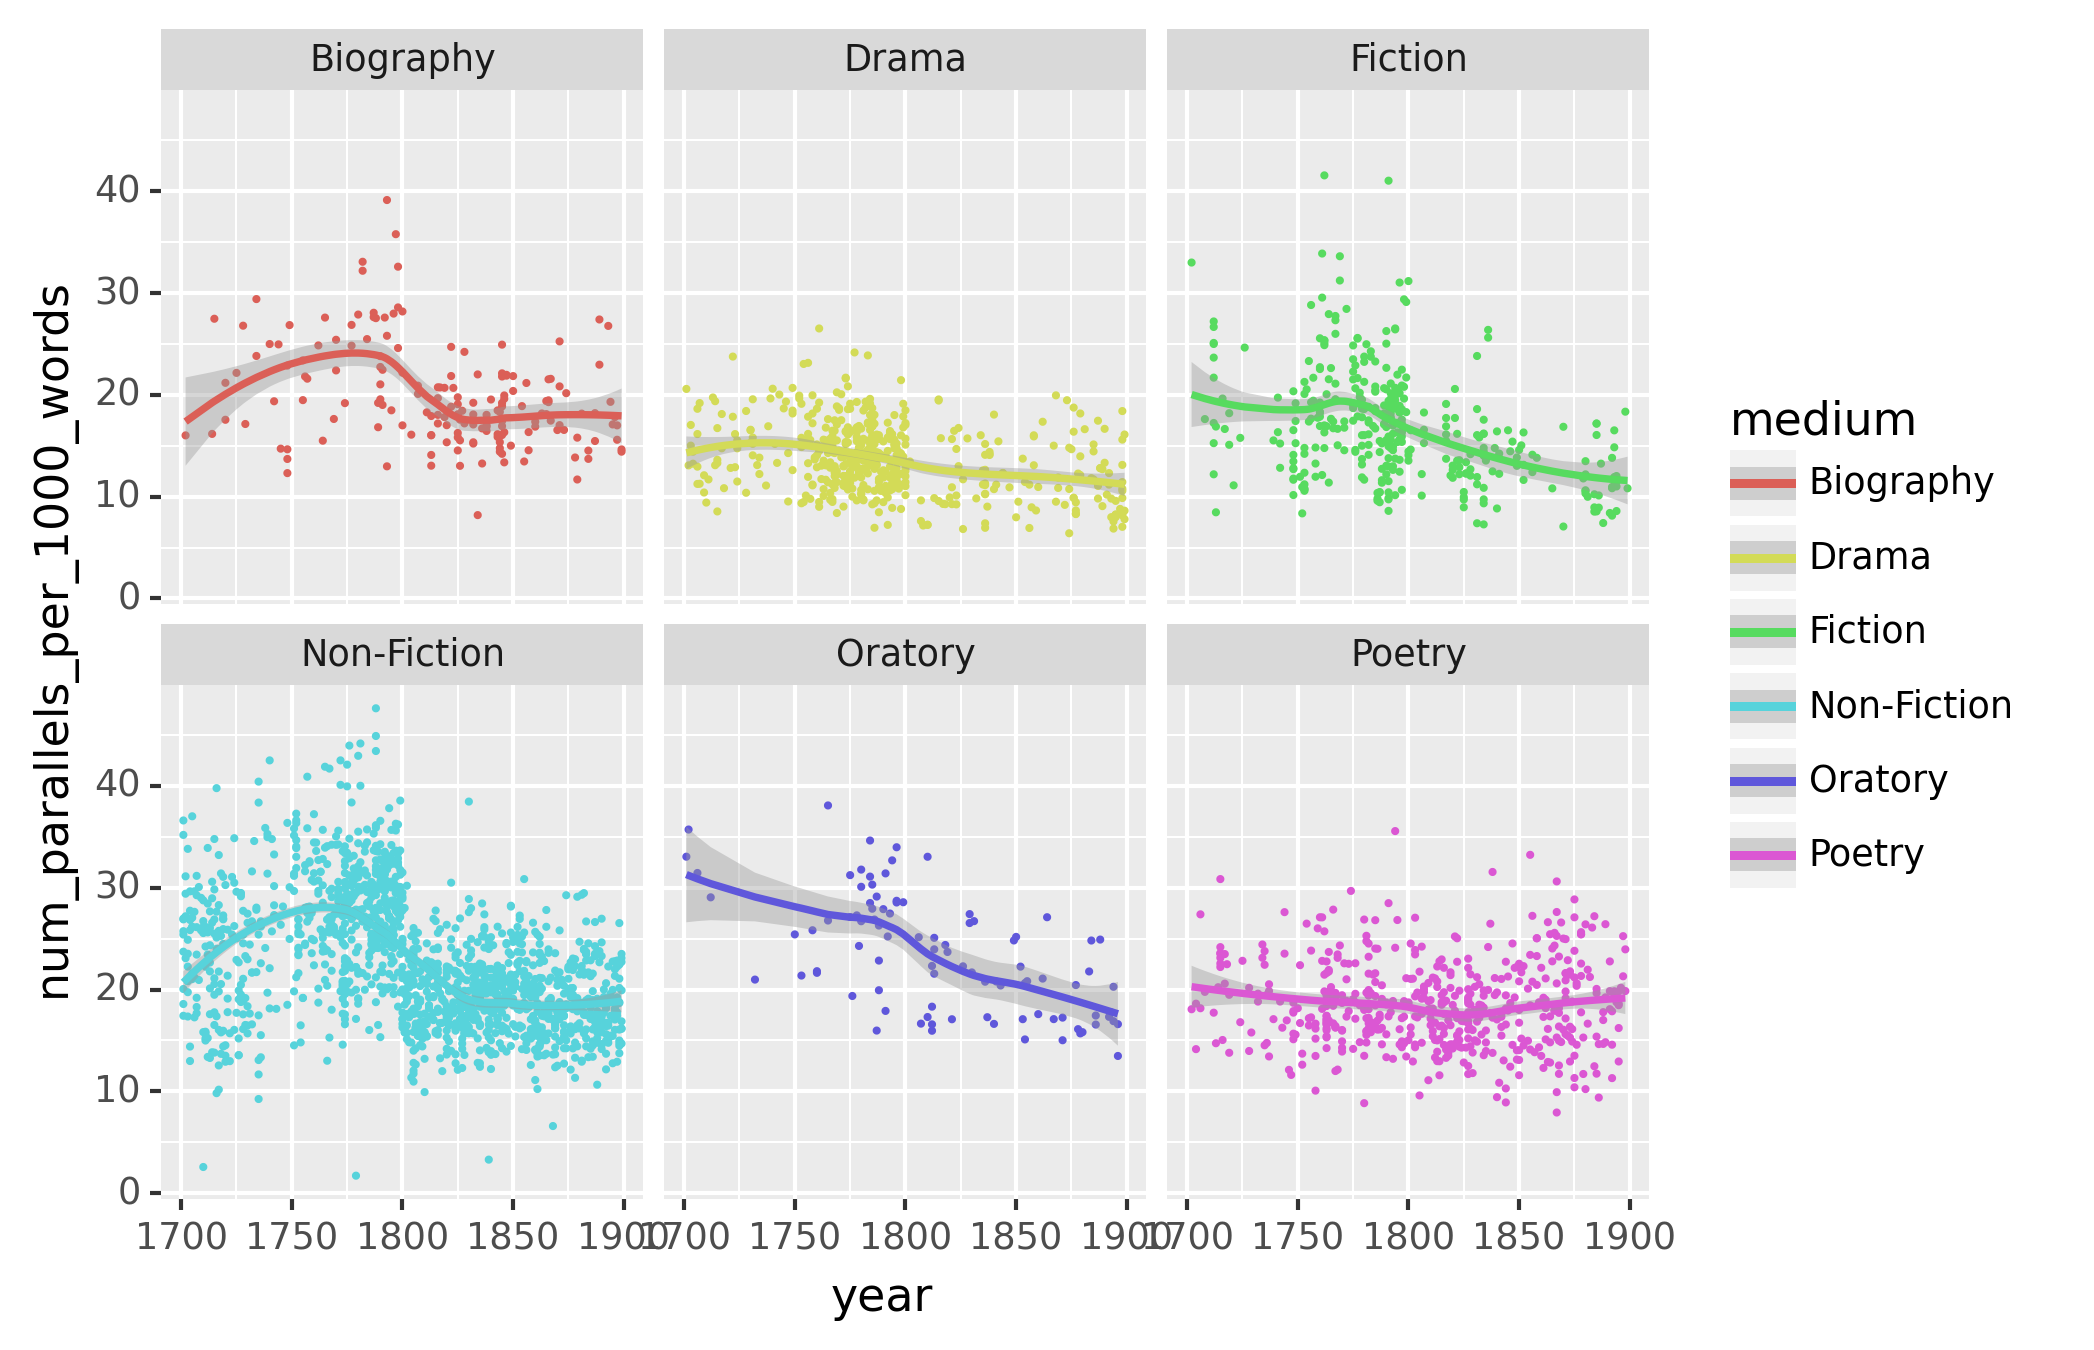

<ggplot: (708710569)>

In [43]:
import plotnine as p9
k='num_parallels_per_1000_words'
datameta['year']=pd.to_numeric(datameta['year'],errors='coerce')
figdf=datameta.query('1700<=year<1900 & num_words_data>=5000')
figdf=figdf[figdf.medium.isin({'Oratory','Biography','Non-Fiction','Poetry','Drama','Fiction'})]
fig=p9.ggplot(figdf,p9.aes(x='year', y=k, color='medium'))
fig+=p9.geom_point(size=.1)
fig+=p9.geom_smooth(se=True,method='loess')
fig+=p9.facet_wrap('medium')
fig

In [44]:
datameta[datameta.author.str.contains('Johnson, Samuel')][['medium','title']]

,medium,title
id,,
K008295.002,Non-Fiction,THE RAMBLER.
K008295.001,Non-Fiction,THE RAMBLER.
K008295.003,Non-Fiction,THE RAMBLER.
K008295.006,Non-Fiction,THE RAMBLER.
K008295.005,Non-Fiction,THE RAMBLER.
K008295.004,Non-Fiction,THE RAMBLER.
